problem 1: small world

In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('input_game.csv')
df2 = pd.read_csv('input_game.csv')

In [3]:
df2["p1_id"], df2["p2_id"] = df1["p2_id"], df1["p1_id"]
df2["p1_action"], df2["p2_action"] = df1["p2_action"], df1["p1_action"]


In [4]:
df = pd.concat([df1, df2], ignore_index=True)
df['p1_action'] = df['p1_action'].map({'TRUST': 1, 'CHEAT': 0})
df['p2_action'] = df['p2_action'].map({'TRUST': 1, 'CHEAT': 0})

In [5]:
df = df.drop(columns='p2_id')
df.rename(columns={'p1_action': 'player move'}, inplace=True)
df.rename(columns={'p1_id': 'player'}, inplace=True)
df.rename(columns={'p2_action': 'opponent move'}, inplace=True)
df.rename(columns={'game_id': 'game number'}, inplace=True)

In [6]:
df['-0'] = df['opponent move']
df['-1'] = df['opponent move'].shift(1)
df['-2'] = df['opponent move'].shift(2)
df['-3'] = df['opponent move'].shift(3)
df['-4'] = df['opponent move'].shift(4)
df['-5'] = df['opponent move'].shift(5)
df['+1'] = df['player move'].shift(1)
df['+2'] = df['player move'].shift(2)
df['+3'] = df['player move'].shift(3)

In [7]:
df

,game number,player,player move,opponent move,turn,-0,-1,-2,-3,-4,-5,+1,+2,+3
0,0,174,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,174,0,1,2,1,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2,0,174,1,1,3,1,1.0,0.0,NaN,NaN,NaN,0.0,1.0,NaN
3,0,174,1,1,4,1,1.0,1.0,0.0,NaN,NaN,1.0,0.0,1.0
4,0,174,1,1,5,1,1.0,1.0,1.0,0.0,NaN,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360807,3014,169,1,0,64,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
360808,3014,169,1,0,65,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
360809,3014,169,1,0,66,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
360810,3014,169,1,0,67,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [8]:
# Function to remove first 5 games from each game_id
def remove_first_n_games(df, n=5):
    return df.groupby('game number').apply(lambda x: x.iloc[n:]).reset_index(drop=True)

# Remove first 5 games from each game_id
df_filtered = remove_first_n_games(df)

/var/folders/wl/q8prsl_x2_g_hl0vv6cf0xj00000gn/T/ipykernel_16780/3753838528.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('game number').apply(lambda x: x.iloc[n:]).reset_index(drop=True)


In [9]:
#df_filtered = df

In [10]:
df_filtered = df_filtered.drop(columns='opponent move')
df_filtered = df_filtered.drop(columns='turn')

In [11]:
df_filtered

,game number,player,player move,-0,-1,-2,-3,-4,-5,+1,+2,+3
0,0,174,1,1,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
1,0,174,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0,174,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0,174,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0,174,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
345732,3014,169,1,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
345733,3014,169,1,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
345734,3014,169,1,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
345735,3014,169,1,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


/var/folders/wl/q8prsl_x2_g_hl0vv6cf0xj00000gn/T/ipykernel_16780/2290978366.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.dropna(inplace=True)
/opt/anaconda3/envs/eda_env/lib/python3.12/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


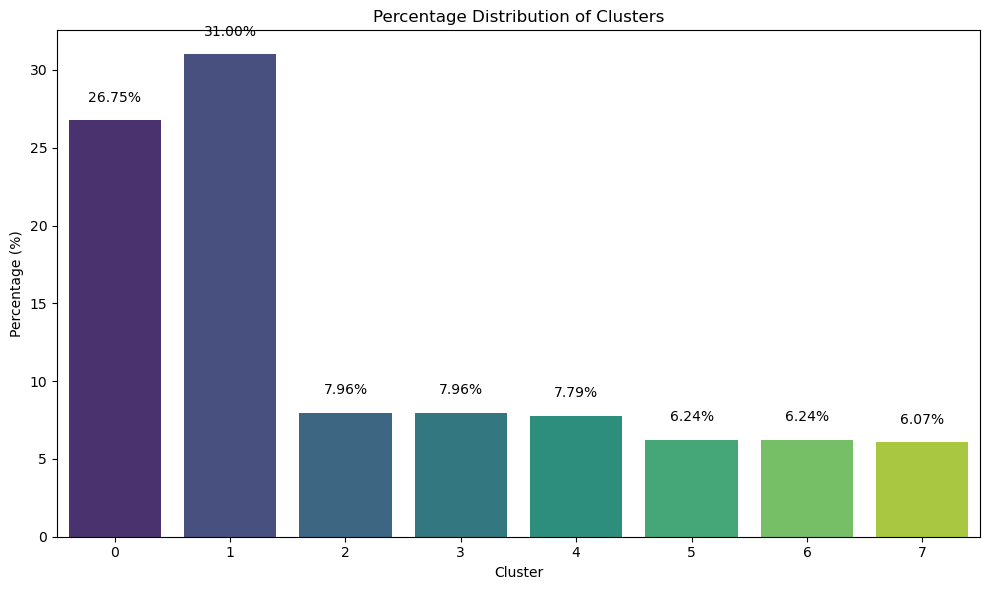

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming features is your DataFrame with columns '-0', '-1', '-2', '-3', '-4'
features = df[['-0', '-1', '-2']]

# Drop rows with NaN values
features.dropna(inplace=True)

# Apply feature scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform k-means clustering
kmeans = KMeans(n_clusters=16, init='k-means++')
clusters = kmeans.fit_predict(features_scaled)

# Calculate percentage of points in each cluster
unique, counts = np.unique(clusters, return_counts=True)
percentage = counts / len(clusters) * 100

# Plotting
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x=np.arange(len(unique)), y=percentage, palette='viridis')

plt.xlabel('Cluster')
plt.ylabel('Percentage (%)')
plt.title('Percentage Distribution of Clusters')

# Annotate percentages on top of bars
for i, pct in enumerate(percentage):
    plt.text(i, pct + 1, f'{pct:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(np.arange(len(unique)), unique)
plt.tight_layout()  # Adjust layout to prevent overlapping annotations
plt.show()


/var/folders/wl/q8prsl_x2_g_hl0vv6cf0xj00000gn/T/ipykernel_16780/3903436422.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.dropna(inplace=True)
/opt/anaconda3/envs/eda_env/lib/python3.12/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


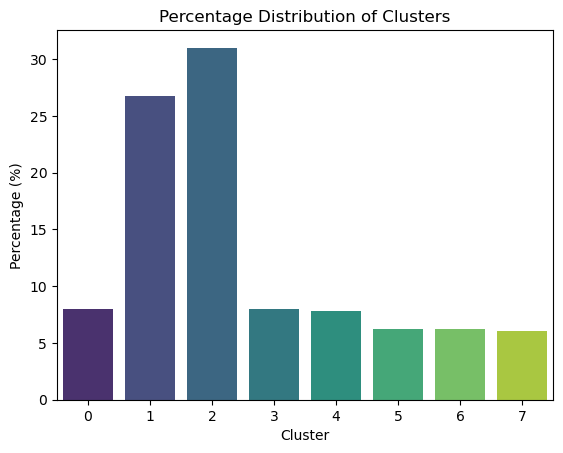

        -0   -1   -2
3        1  1.0  1.0
4        1  1.0  1.0
5        1  1.0  1.0
6        1  1.0  1.0
7        1  1.0  1.0
...     ..  ...  ...
360807   0  0.0  0.0
360808   0  0.0  0.0
360809   0  0.0  0.0
360810   0  0.0  0.0
360811   0  0.0  0.0

[208365 rows x 3 columns]


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns '-0', '-1', '-2'
features = df[['-0', '-1', '-2']]

# Drop rows with NaN values
features.dropna(inplace=True)

# Apply feature scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform k-means clustering
kmeans = KMeans(n_clusters=16, init='k-means++')
clusters = kmeans.fit_predict(features_scaled)

# Add cluster labels to the original DataFrame
df_clusters = features.copy()
df_clusters['cluster'] = clusters

# Calculate percentage of points in each cluster
unique, counts = np.unique(clusters, return_counts=True)
percentage = counts / len(clusters) * 100

# Plot percentage of points in each cluster using Seaborn
sns.barplot(x=np.arange(len(unique)), y=percentage, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Percentage (%)')
plt.title('Percentage Distribution of Clusters')
plt.xticks(np.arange(len(unique)), unique)
plt.show()

# Identify the two largest clusters
largest_clusters = unique[np.argsort(-counts)[:2]]

# Filter the DataFrame to include only the data points from the two largest clusters
df_largest_clusters = df_clusters[df_clusters['cluster'].isin(largest_clusters)]

# Drop the cluster column if you don't need it in the new DataFrame
df_largest_clusters = df_largest_clusters.drop(columns=['cluster'])

# Display the new DataFrame
print(df_largest_clusters)


In [15]:
# Create a DataFrame excluding the rows from the two largest clusters
df_other_clusters = df[~df.index.isin(df_largest_clusters.index)]
df_other = df.loc[df_largest_clusters.index]

/var/folders/wl/q8prsl_x2_g_hl0vv6cf0xj00000gn/T/ipykernel_16780/3923679428.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.dropna(inplace=True)
/opt/anaconda3/envs/eda_env/lib/python3.12/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


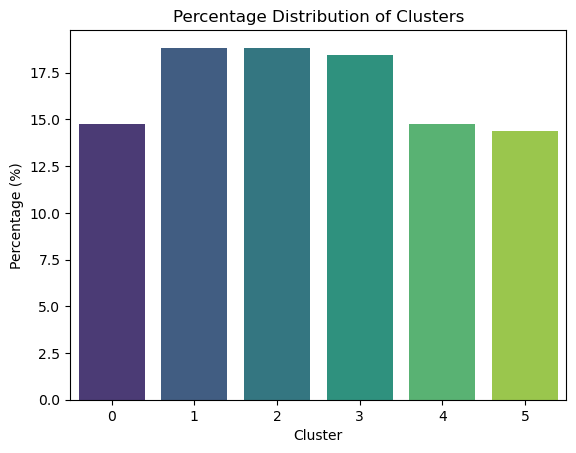

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming features is your DataFrame with columns '-0', '-1', '-2', '-3', '-4'
features = df_other_clusters[['-0', '-1', '-2']]

# Drop rows with NaN values
features.dropna(inplace=True)

# Apply feature scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform k-means clustering
kmeans = KMeans(n_clusters=16, init='k-means++')
clusters = kmeans.fit_predict(features_scaled)

# Calculate percentage of points in each cluster
unique, counts = np.unique(clusters, return_counts=True)
percentage = counts / len(clusters) * 100
# Plot percentage of points in each cluster using Seaborn
sns.barplot(x=np.arange(len(unique)), y=percentage, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Percentage (%)')
plt.title('Percentage Distribution of Clusters')
plt.xticks(np.arange(len(unique)), unique)
plt.show()



/var/folders/wl/q8prsl_x2_g_hl0vv6cf0xj00000gn/T/ipykernel_16780/933238583.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.dropna(inplace=True)
/opt/anaconda3/envs/eda_env/lib/python3.12/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


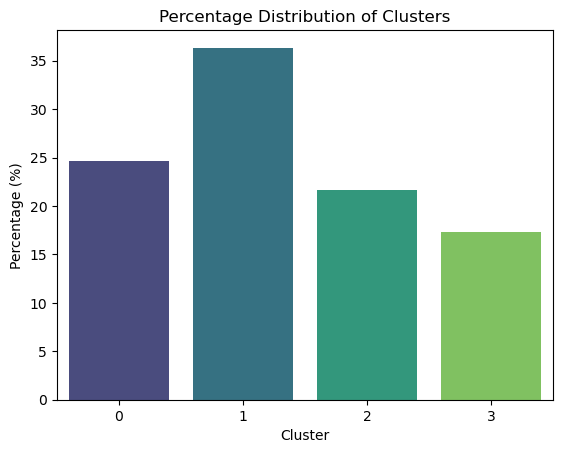

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming features is your DataFrame with columns '-0', '-1', '-2', '-3', '-4'
features = df_other[['-2', '+1']]

# Drop rows with NaN values
features.dropna(inplace=True)

# Apply feature scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform k-means clustering
kmeans = KMeans(n_clusters=16, init='k-means++')
clusters = kmeans.fit_predict(features_scaled)

# Calculate percentage of points in each cluster
unique, counts = np.unique(clusters, return_counts=True)
percentage = counts / len(clusters) * 100
# Plot percentage of points in each cluster using Seaborn
sns.barplot(x=np.arange(len(unique)), y=percentage, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Percentage (%)')
plt.title('Percentage Distribution of Clusters')
plt.xticks(np.arange(len(unique)), unique)
plt.show()

